# KNN 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [2]:
X, y = make_moons(n_samples = 1000, noise=0.3)

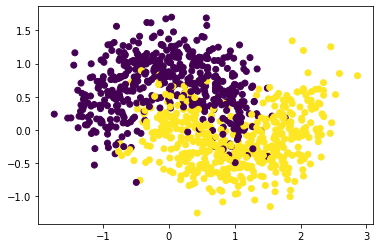

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [51]:
knn = KNeighborsClassifier(n_neighbors = 41, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                     weights='uniform')

In [8]:
import numpy as np

In [23]:
space = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(space, space)

In [24]:
xy_space = np.stack([x_grid, y_grid], axis = -1).reshape(100**2, 2)

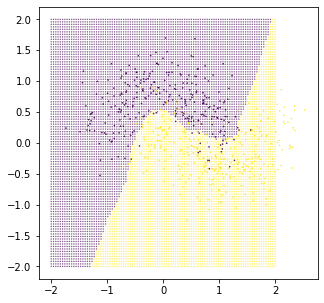

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(xy_space[:,0], 
           xy_space[:,1], 
            s = 0.1,
           c=knn.predict(xy_space))
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, s=0.3)

In [36]:
from sklearn.metrics import accuracy_score

In [39]:
train_accuracy = []
test_accuracy = []
for i in range(1,300):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
    

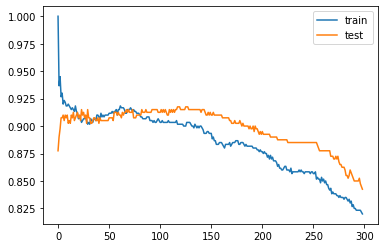

In [40]:
plt.plot(train_accuracy, label = 'train')
plt.plot(test_accuracy, label = 'test')
plt.legend()

In [41]:
from sklearn.model_selection import GridSearchCV

In [48]:
gcv = GridSearchCV(
    knn, param_grid={'n_neighbors' : np.arange(1,50),'p':[1,2]}
)

In [49]:
gcv.fit(X_train, y_train)

C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=299, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
gcv.best_params_

{'n_neighbors': 41, 'p': 2}

In [54]:
from sklearn.neighbors import KDTree

In [55]:
kd_tree = KDTree(X_train)